# Data Visualization

#### Authors - Aishwarya and Manjushree

In [1]:
#  Importing Necessary Python Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.feature_selection import f_regression,mutual_info_regression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/churn_final.csv')

In [3]:
def countplot(x1,df,title):
    sns.set_style("dark")
    sns.countplot(x=x1, data=df, palette=sns.color_palette("Paired", 7), saturation=10)
    plt.title(title,fontsize = 20)
    plt.show() 

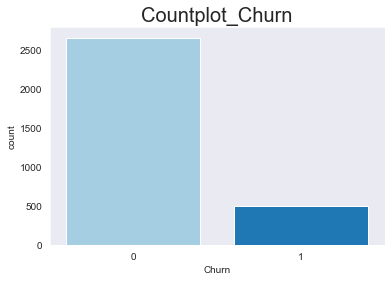

Count plot  - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable

Observation1: 
We will display the target variable and check for data imbalance using this Count plot (if there are more number of churn customers than customers who wont churn or vice versa)
There is some data imbalance, as the number of churn consumers is significantly lower than the number of customers that will not churn


<Figure size 432x288 with 0 Axes>

In [4]:
countplot('Churn',df,'Countplot_Churn')
print('\033[1mCount plot \033[0m - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable')
print('\n\033[1mObservation1: \033[0m\nWe will display the target variable and check for data imbalance using this Count plot (if there are more number of churn customers than customers who wont churn or vice versa)')
print('There is some data imbalance, as the number of churn consumers is significantly lower than the number of customers that will not churn')
plt.savefig('./images/countPlot_churn.png')

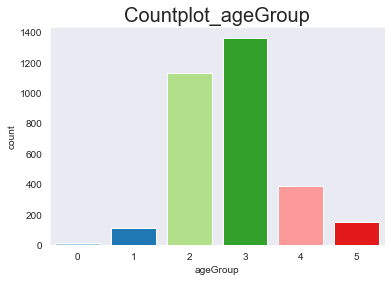


Observation2: 
Using count plot, lets see the frequency/count of different age group
Agegroup Range 
[0-15]    :   1
[15-30]   :   2
[30-45]   :   3
[45-60]   :   4
[60-80]   :   5
[<0,>80]  :   2
There are more people between the ages of 15 and 45


<Figure size 432x288 with 0 Axes>

In [5]:
countplot('ageGroup',df,'Countplot_ageGroup')
print('\n\033[1mObservation2: \033[0m\nUsing count plot, lets see the frequency/count of different age group')
print('Agegroup Range \n[0-15]    :   1\n[15-30]   :   2\n[30-45]   :   3\n[45-60]   :   4\n[60-80]   :   5\n[<0,>80]  :   2')    
print('There are more people between the ages of 15 and 45')
plt.savefig('./images/countPlot_ageGroup.png')

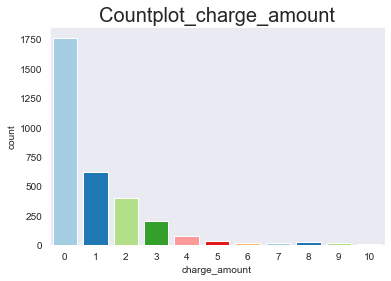


Observation3: 
Charge amount is an ordinal attribute with lowest value being 0 and highest being 9
The charge amount of 0 has the highest count


<Figure size 432x288 with 0 Axes>

In [6]:
countplot('charge_amount',df,'Countplot_charge_amount')
print('\n\033[1mObservation3: \033[0m\nCharge amount is an ordinal attribute with lowest value being 0 and highest being 9')
print('The charge amount of 0 has the highest count')
plt.savefig('./images/countPlot_chargeAmount.png')

 Distribution_plot - Distribution_plot is basically multiple count plots displaying the occurence of the observation present in the categorical variable


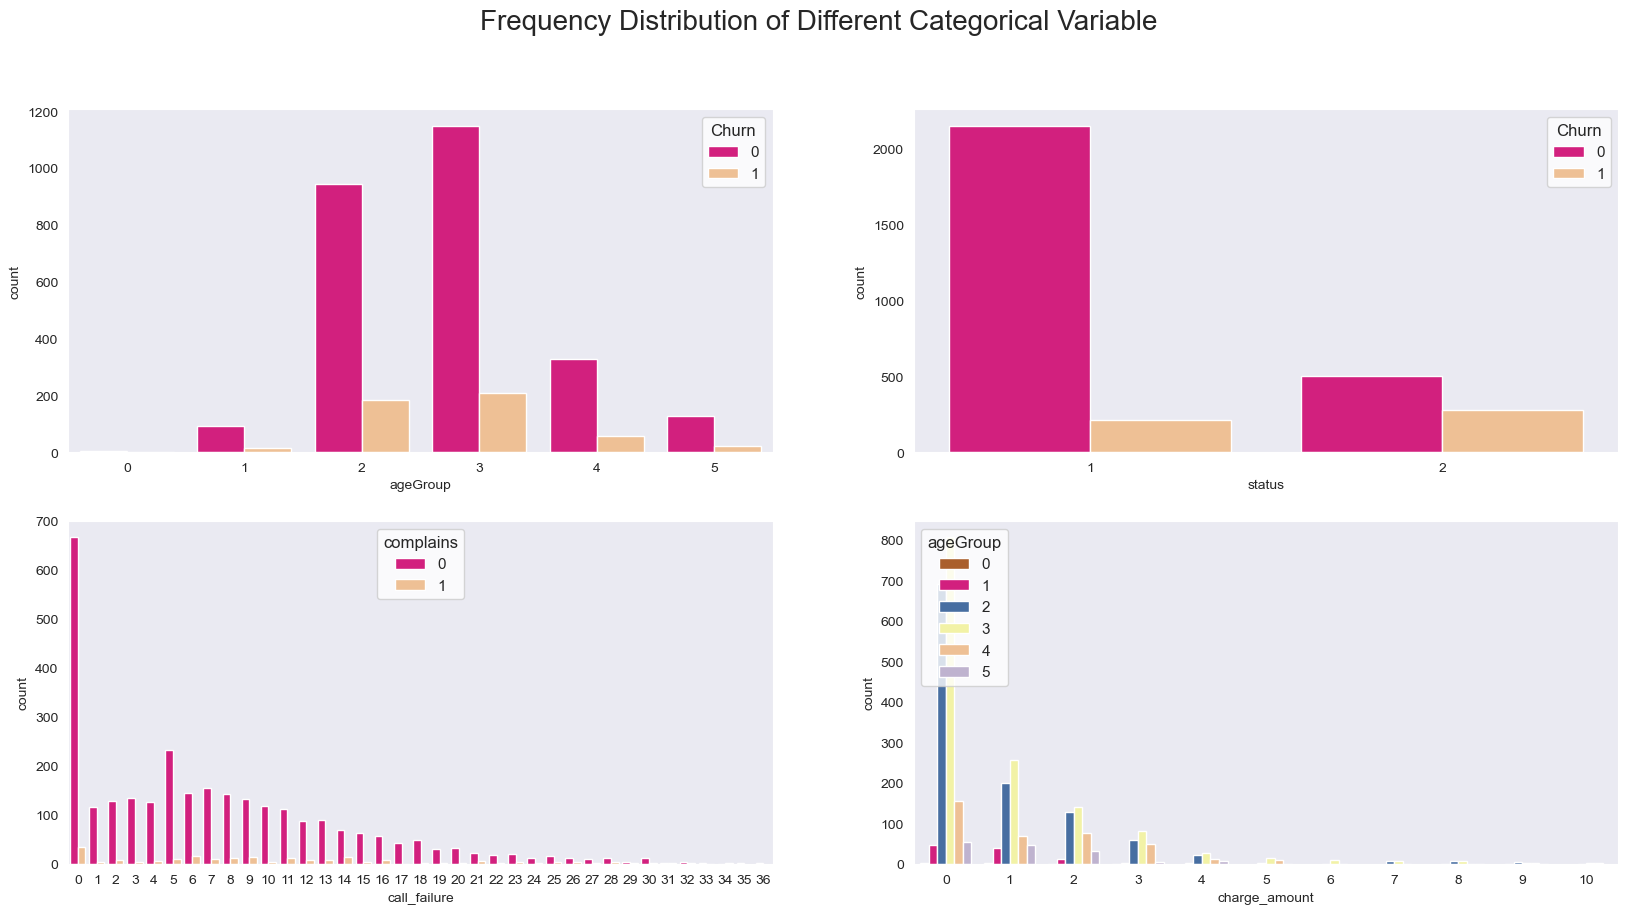

 Observation1: 
We observe that there are many customers who are in the age group 30-60 and  are less likely to churn
 Observation2: 
We observe that the difference in count is huge between churn and non churn active customers(where active customers are more likely to not churn) as that of churn and non churn inactive customers
 Observation3: 
We observe that more number of customers have 0 call failures and hence 0 complaints
 Observation4: 
We observe that more number of customers who are in the age group of 30-60 have charge amount as o which refers to lowest pay 


In [7]:
print('\033[1m Distribution_plot - \033[0mDistribution_plot is basically multiple count plots displaying the occurence of the observation present in the categorical variable')
fig, axarr = plt.subplots(2,2, figsize=(20,10), dpi=100, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='ageGroup', hue = 'Churn',data = df, ax=axarr[0][0], palette="Accent_r")
sns.countplot(x='status', hue = 'Churn',data = df, ax=axarr[0][1], palette="Accent_r")
sns.countplot(x='call_failure', hue = 'complains',data = df,ax=axarr[1][0], palette="Accent_r")
sns.countplot(x='charge_amount', hue = 'ageGroup',data = df, ax=axarr[1][1], palette="Accent_r")
fig.suptitle('Frequency Distribution of Different Categorical Variable',fontsize = 20)
plt.savefig('./images/Frequency_Distribution_afterCleaning.png')
plt.show()
print('\033[1m Observation1: \033[0m\nWe observe that there are many customers who are in the age group 30-60 and  are less likely to churn')
print('\033[1m Observation2: \033[0m\nWe observe that the difference in count is huge between churn and non churn active customers(where active customers are more likely to not churn) as that of churn and non churn inactive customers')
print('\033[1m Observation3: \033[0m\nWe observe that more number of customers have 0 call failures and hence 0 complaints')
print('\033[1m Observation4: \033[0m\nWe observe that more number of customers who are in the age group of 30-60 have charge amount as o which refers to lowest pay ')

 Pie chart -  Pie charts make sense to show a parts-to-whole relationship for categorical or nominal data


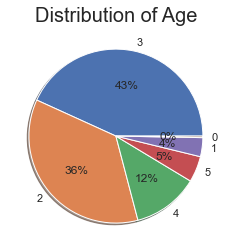

 Observation1: As we can see from the pie chart, most of the customers are of the age group 30-45


In [8]:
print('\033[1m Pie chart - \033[0m Pie charts make sense to show a parts-to-whole relationship for categorical or nominal data')
plt.pie(df['ageGroup'].value_counts(), labels=df['ageGroup'].value_counts().index.tolist(), autopct='%1.0f%%',shadow = True)
plt.title('Distribution of Age', fontsize = 20)
plt.savefig('./images/pie_chart_ageDistribution.png')
plt.show()
print('\033[1m Observation1: \033[0mAs we can see from the pie chart, most of the customers are of the age group 30-45')

 Box plots - Box plots help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset


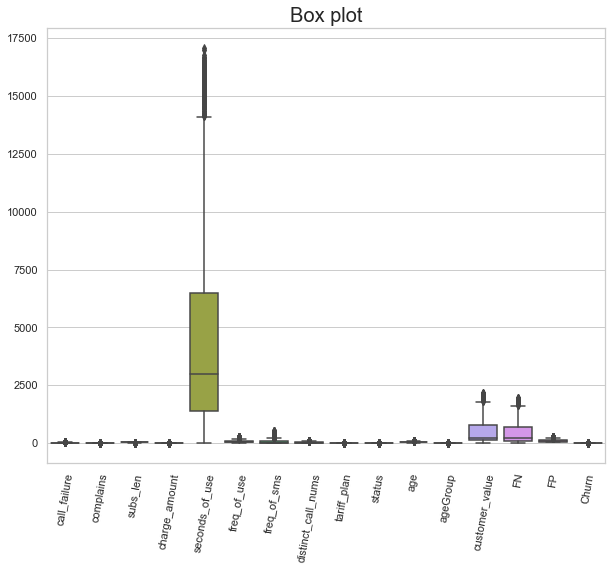

 Observation1: As we can see there are outliers in our dataset, especially in seconds_of_use column we have more outliers


In [9]:
print('\033[1m Box plots -\033[0m Box plots help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset')
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=80)
plt.title("Box plot",fontsize = 20)
plt.savefig('./images/boxplot_afterCleaning.png')
plt.show()
print('\033[1m Observation1: \033[0mAs we can see there are outliers in our dataset, especially in seconds_of_use column we have more outliers')

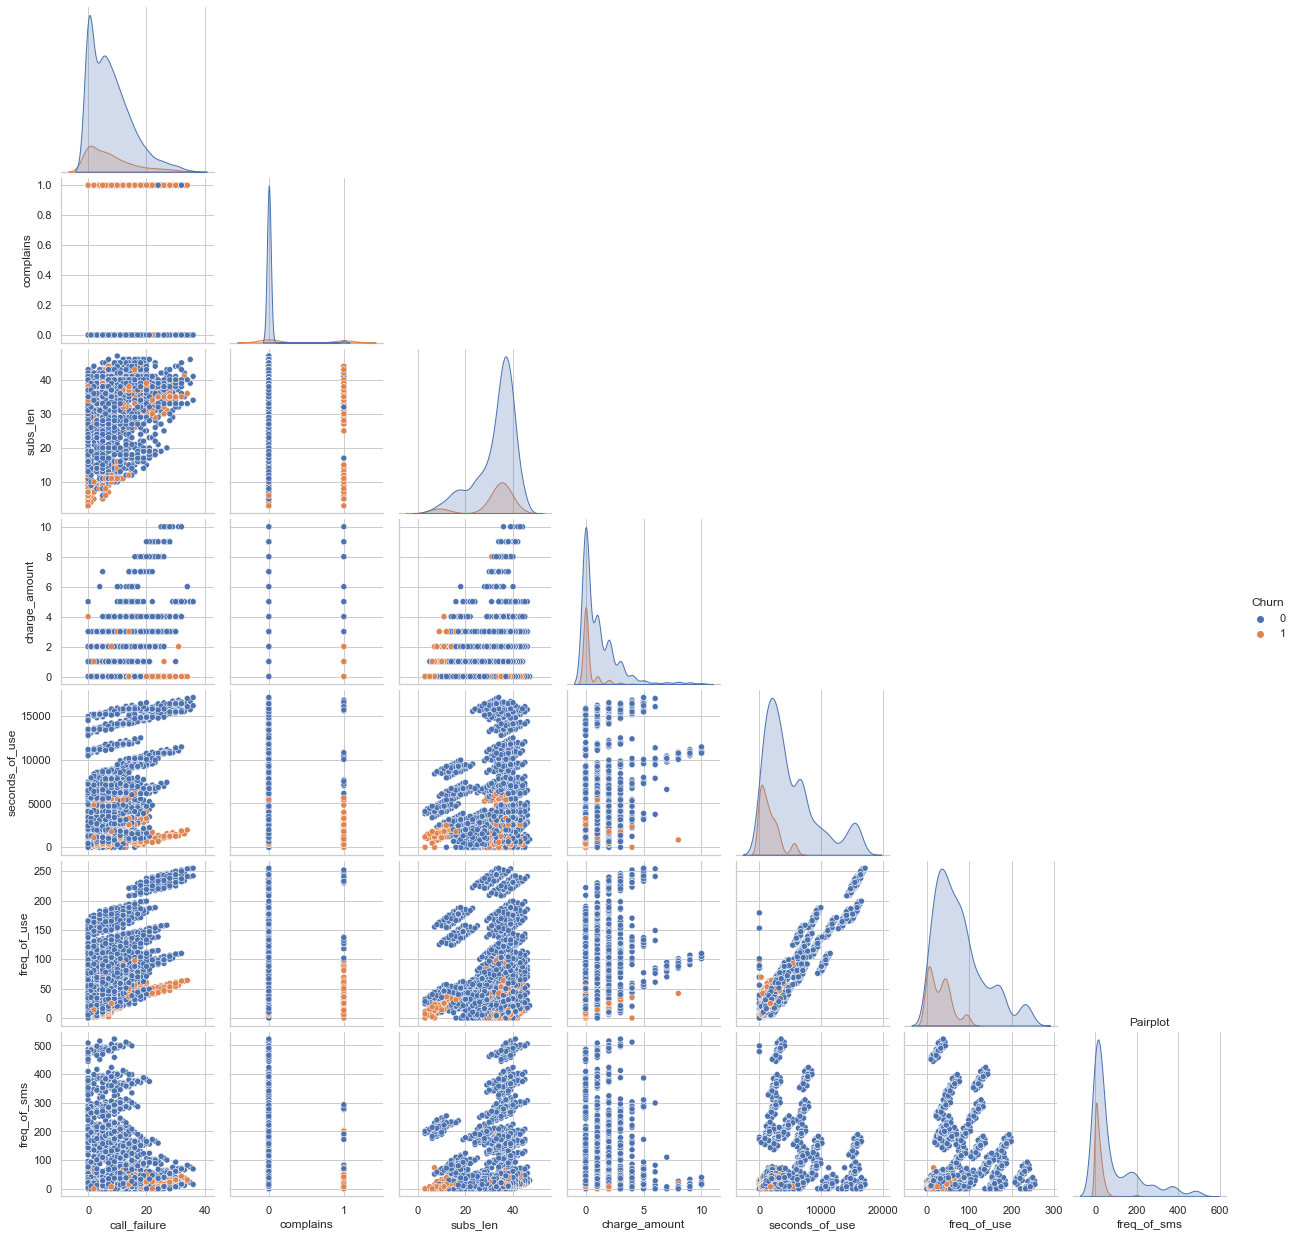

 Pairplot -  A Pairplot allows us to see both distribution of single variables and relationships between two variables
 Observation1: We observe a strong positive correlation between freq_of_use and seconds_of_use
 Observation2: We observe a slight positive correlation between charge_amount and call_failure
 Observation1: We observe a  positive correlation between freq_of_use and call_failure


<Figure size 432x288 with 0 Axes>

In [10]:
sns.pairplot(df,vars=df.columns[:7], corner=True, hue = 'Churn' )
plt.title('Pairplot')
plt.show()
print('\033[1m Pairplot -  \033[0mA Pairplot allows us to see both distribution of single variables and relationships between two variables')
print('\033[1m Observation1: \033[0mWe observe a strong positive correlation between freq_of_use and seconds_of_use')
print('\033[1m Observation2: \033[0mWe observe a slight positive correlation between charge_amount and call_failure')
print('\033[1m Observation1: \033[0mWe observe a  positive correlation between freq_of_use and call_failure')
plt.savefig('./images/pairPlot.png')

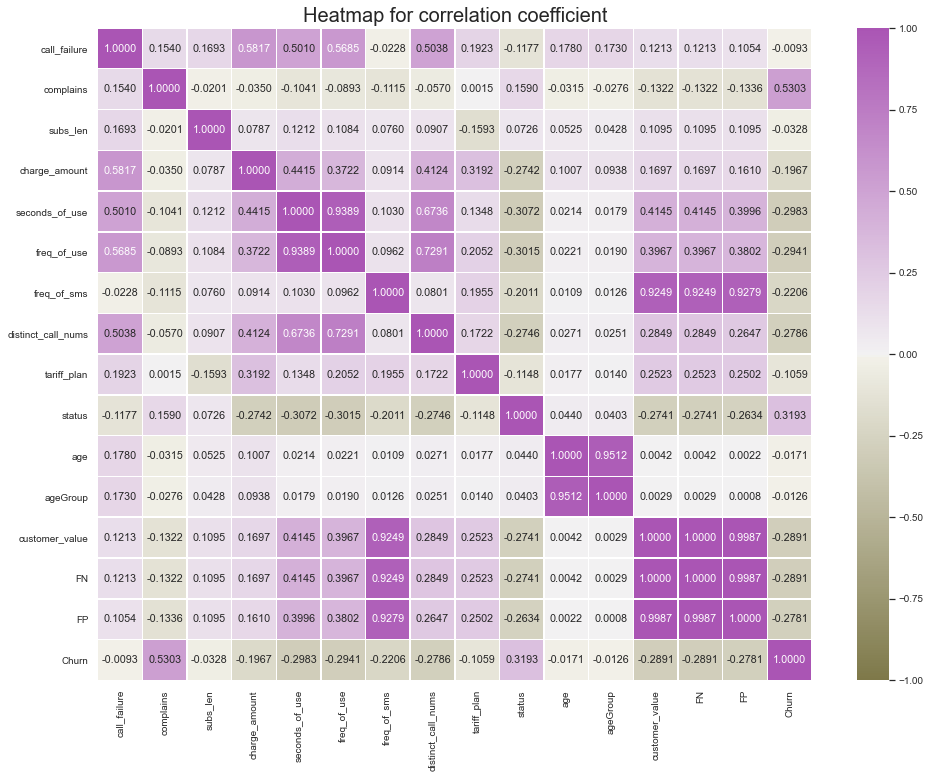


 Observation1: We observe a  positive correlation between freq_of_use and distinct_call_nums. The correlation coefficient value is 0.9389
 Observation2: We observe a  positive correlation between charge_amount and call_failure. The correlation coefficient value is 0.5817
 Observation2: We observe a  positive correlation between freq_of_use and customer_value. The correlation coefficient value is 0.9249
 Observation2: We observe very less correlation between call_failue and churn. The correlation coefficient value is -0.0093


<Figure size 432x288 with 0 Axes>

In [11]:
df_corr = df.corr()
# correlation matrix
sns.set(font_scale=0.9)
plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(80, 302, s=60, as_cmap=True))
#plt.yticks(rotation=0)
plt.title('Heatmap for correlation coefficient',fontsize = 20)
plt.show()
print()
print('\033[1m Observation1: \033[0mWe observe a  positive correlation between freq_of_use and distinct_call_nums. The correlation coefficient value is 0.9389')
print('\033[1m Observation2: \033[0mWe observe a  positive correlation between charge_amount and call_failure. The correlation coefficient value is 0.5817')
print('\033[1m Observation2: \033[0mWe observe a  positive correlation between freq_of_use and customer_value. The correlation coefficient value is 0.9249')
print('\033[1m Observation2: \033[0mWe observe very less correlation between call_failue and churn. The correlation coefficient value is -0.0093')
plt.savefig('./images/heatmap_afterCleaning.png')

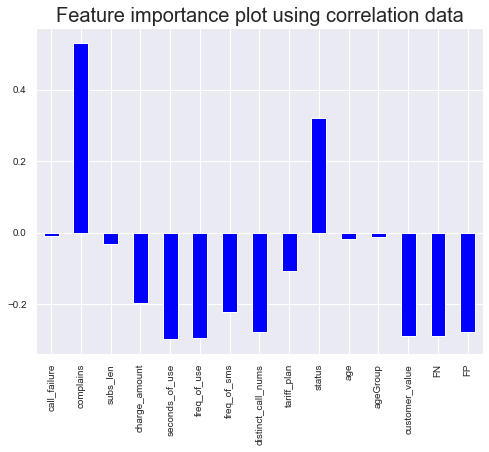

 Observation1: From the graph we observe that status and complain are influential features for this dataset


<Figure size 432x288 with 0 Axes>

In [12]:
df.drop('Churn', axis=1).corrwith(df.Churn).plot(kind='bar', figsize=(8, 6), color='blue', title="Churn vs all features")
plt.title('Feature importance plot using correlation data',fontsize = 20)
plt.show()
print('\033[1m Observation1: \033[0mFrom the graph we observe that status and complain are influential features for this dataset')
plt.savefig('./images/featureImportance.png')


 A violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region. Densities are frequently accompanied by an overlaid chart type, such as box plot, to provide additional information.

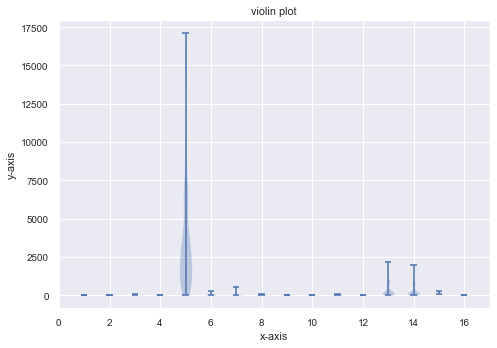

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('violin plot')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
bp = ax.violinplot(df)
plt.show()

In [33]:
sns.set(style="whitegrid")

# df = datasets[0]

f, ax = plt.subplots(figsize=(20, 10))

# Show each distribution with both violins and points
sns.violinplot(data=df, inner="box", palette="Accent_r", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Chick weights by feed type', fontsize=18, fontweight='bold')
ax.set_xlabel("Category",size = 16,alpha=0.7)
ax.set_ylabel("Vlaues (g)",size = 16,alpha=0.7)

SyntaxError: invalid syntax (<ipython-input-33-17fecbf7ee85>, line 8)

#### Feature Selection - Select-k Best

In [13]:
x = df.iloc[:,:15]
#store the output variable in y
y = df.iloc[:,15]
selector = SelectKBest(score_func=f_regression, k=13)
selector.fit(x, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = df.iloc[:,cols]

In [14]:
features_df_new['Churn'] = df['Churn']
features_df_new.drop(['FP','FN'], axis = 1, inplace=True )


#### Observation


In [15]:
features_df_new.to_csv('churn_features.csv', index = False);

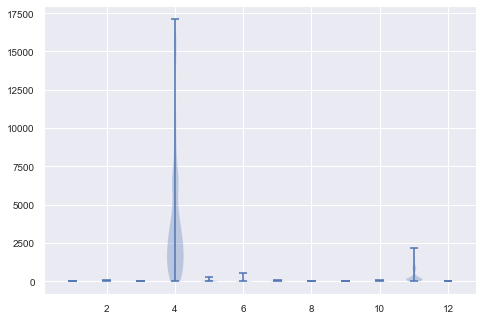